### **NLP pipeline:**
>NLP is a field of AI in which computer analyze, understand, and derive meaningful informaion of human language. NLP pipeline is set of steps followed to build an end to end NLP software.

####*Steps:*
1. Data Acquisition
2. Text Preprocessing 
3. Feature Engineering
4. Model Building
5. Evaluation
6. Deployment


###**Text Preprocessing:** <br>
- removing unhelpful parts of data (noise) and making it ready to fed to the model
- increases the accuracy of model
- used Python libraries: nltk, spacy, textblob

#####*Basic Preprocessing:* 
>HTML tag removal<br>
http removal<br>
Digits Removal<br>
Spelling checker<br>
Punctuation Removal

>Tokenization<br>
Stemming/Lemmatization<br>
Stopwords Removal<br>
Lowercasing

>Pos Tagging<br>
Parsing<br>
Chunking, Chinking

Importing libraries

In [ ]:
import nltk
import re
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

Downloading the required packages

In [ ]:
!pip install svgling # to get the tree for chunked words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 3.5 MB/s 


In [ ]:
nltk.download('maxent_ne_chunker') # for named entity recognition
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('stopwords') #required for stopwords removal

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt') #required for tokenization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet') #required for lemmaization
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download('tagsets') #for nltk.help tagset to view the meaning of part-of-speech

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

Creating the paragraph to work on

In [ ]:
paragraph = "Hi, I am learning NLP #ML #DS #NLP. I am playing football. I have a good history. I am better at it. Ram also loves playing football. My instgram name is @kamalgodar. <body> My phone number is 9841959244. </body> My Facebok profil link is: https://www.facebook.com/itskamalgodar"

Html Tags Removal

In [ ]:
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'', text)

In [ ]:
paragraph = remove_html_tags(paragraph)
paragraph

'Hi, I am learning NLP #ML #DS #NLP. I am playing football. I am better at it. Ram loves singing song. My instgram name is @kamalgodar.  My phone number is 9841959244.  My Facebok profil link is: https://www.facebook.com/itskamalgodar'

URL Removal


In [ ]:
def remove_url(text):
  pattern = re.compile('https?://\S+|www\.S+')
  return pattern.sub(r'', text)

In [ ]:
paragraph = remove_url(paragraph)
paragraph

'Hi, I am learning NLP #ML #DS #NLP. I am playing football. I am better at it. Ram loves singing song. My instgram name is @kamalgodar.  My phone number is 9841959244.  My Facebok profil link is: '

 Mentions, Hastags, Numbers, and Punctuations Removal

In [ ]:
paragraph = re.sub("@[A-Za-z0-9_]+","", paragraph) # + denotes one or more occurances left to it
paragraph = re.sub("#[A-Za-z0-9_]+","", paragraph) # underscore inside [] denotes action is taken for # containing _ also 
paragraph = re.sub("[0-9]", "", paragraph) # numbers has no useful meaning howver it appears in word or sentences
paragraph = re.sub("[.,:]", "", paragraph) # during tokenization they are tokenized as separate tokens so omitting
paragraph

'Hi I am learning NLP    I am playing football I am better at it Ram loves singing song My instgram name is   My phone number is   My Facebok profil link is '

Removing Punctuations

In [ ]:
import string
punc = string.punctuation
def remove_punctuation(text):
  for char in punc:
    text = text.replace(char, '')
  return text

 Duplicates Removal

In [ ]:
def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist
    
paragraph =' '.join(unique_list(paragraph.split()))
paragraph

'Hi I am learning NLP playing football better at it Ram loves singing song My instgram name is phone number Facebok profil link'

 Lowercasing

In [ ]:
paragraph = paragraph.lower()
paragraph

'hi i am learning nlp playing football better at it ram loves singing song my instgram name is phone number facebok profil link'

###Stopwords: <br>
>Stopwords are those words that doesnot add any meaning to the text. e.g, be, and, the, a, is, etc <br>

###Tokenization: <br>
> Tokenization is the process of splitting the text document (phrase, sentence, etc) into smaller units called tokens.

>*sentence tokenization:* tokenization of sentence usually by fullstop delimiter<br>
*word tokenization:* tokenization of word by space delimiter

###Stemming:<br>
> Stemming maps words to its stem by removing the suffix and prefix, without giving any value to the meaning. <br>
histoy/historical---> histori

> PorterStemmer() for english language <br>
SnowballStemmetr() for multiple language

Application: Spam Classifier, Sentiment Analysis, etc <br>

###Lemmatization:<br>
>Lemmatization does the same thing as stemming and tries to bring word to its base form keeping in account of actual meaning of word. <br>
histoy/historical ---> history <br>
going/goes/gone ---> go

Application: Chatbot, Q/A application where the response should be meaningful

*Lemmatization takes more time than stemming.*


 Tokenization

In [ ]:
tokens = word_tokenize(paragraph)
tokens

['hi',
 'i',
 'am',
 'learning',
 'nlp',
 'playing',
 'football',
 'better',
 'at',
 'it',
 'ram',
 'loves',
 'singing',
 'song',
 'my',
 'instgram',
 'name',
 'is',
 'phone',
 'number',
 'facebok',
 'profil',
 'link']

StopWord Removal

In [ ]:
stop_words = stopwords.words('english')
words_without_stopwords = []
for word in tokens:
  if word in stop_words:
    continue
  else:
    words_without_stopwords.append(word)

tokens = words_without_stopwords
tokens

['hi',
 'learning',
 'nlp',
 'playing',
 'football',
 'better',
 'ram',
 'loves',
 'singing',
 'song',
 'instgram',
 'name',
 'phone',
 'number',
 'facebok',
 'profil',
 'link']

 Stemming

In [ ]:
stemmer = PorterStemmer()
new_tokens0 = []
for word in tokens:
  new_tokens0.append(stemmer.stem(word))
  print(word, '|', stemmer.stem(word))

# new_tokens0

hi | hi
learning | learn
nlp | nlp
playing | play
football | footbal
better | better
ram | ram
loves | love
singing | sing
song | song
instgram | instgram
name | name
phone | phone
number | number
facebok | facebok
profil | profil
link | link


 Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
new_tokens = []
for word in tokens:
  new_tokens.append(lemmatizer.lemmatize(word, pos='v'))
  print(word, "|", lemmatizer.lemmatize(word, pos='v'))

# new_tokens

hi | hi
i | i
am | be
learning | learn
nlp | nlp
playing | play
football | football
better | better
at | at
it | it
ram | ram
loves | love
singing | sing
song | song
my | my
instgram | instgram
name | name
is | be
phone | phone
number | number
facebok | facebok
profil | profil
link | link


Stopwords Removal

### POS Tagging:
>Part of Speech explains how a word is used in a sentence. There are mainly eight parts of speech: nouns, pronouns, adjectives, verbs, adverbs, preposition, conjunctions, and interjections.

>Most POS are divided into sub-class.<br>
Noun:<br>
NN Noun singular ('desk')<br>
NNS Noun plural ('desks')<br>
NNP proper noun singular ('Kamal')<br>
NNPS proper noun plural ('Nepalese')<br>

>POS tagging simply means labeling words with their appropriate part of speech. it is a supervised learning solution that
uses the features like previous word, next word, first letter capitalized, etc.

NLTK has a function to get pos tags and it works after tokenization process.



### Chunking: 
>extracting short phrases from sentence tagged with Part-of-Speech (POS).
grouping words into meaningful chunks. (Noun Phrases)<br>
It works on top of POS Tagging

Noun Phrases: phrases of one or more words that contain a noun, with some descriptive words verbs, adverb etc.

Chunk Pattern:
In order to chunk we combine POS tags with regular expression. Chunk Patterns are the regular expressions modified to match POS tags.



###Chinking:
>After chinking, we may have some words in our chunk that we don't want. 
Chunking is a lot like chunking. It is a way to remove chunk from a chunk. Chunk we remove from the chunk is a chink.


POS Tagging

In [ ]:
tagged = nltk.pos_tag(new_tokens)
tagged

[('hi', 'NN'),
 ('i', 'NN'),
 ('be', 'VB'),
 ('learn', 'VBN'),
 ('nlp', 'JJ'),
 ('play', 'NN'),
 ('football', 'NN'),
 ('better', 'RBR'),
 ('at', 'IN'),
 ('it', 'PRP'),
 ('ram', 'VBZ'),
 ('love', 'IN'),
 ('sing', 'NN'),
 ('song', 'NN'),
 ('my', 'PRP$'),
 ('instgram', 'NN'),
 ('name', 'NN'),
 ('be', 'VB'),
 ('phone', 'NN'),
 ('number', 'NN'),
 ('facebok', 'JJ'),
 ('profil', 'NN'),
 ('link', 'NN')]

In [ ]:
nltk.help.upenn_tagset("PRP$")

PRP$: pronoun, possessive
    her his mine my our ours their thy your


Chunking

(S
  (Chunk hi/NN i/NN)
  be/VB
  learn/VBN
  (Chunk nlp/JJ)
  (Chunk play/NN football/NN)
  better/RBR
  at/IN
  it/PRP
  ram/VBZ
  love/IN
  (Chunk sing/NN song/NN)
  my/PRP$
  (Chunk instgram/NN name/NN)
  be/VB
  (Chunk phone/NN number/NN facebok/JJ)
  (Chunk profil/NN link/NN))


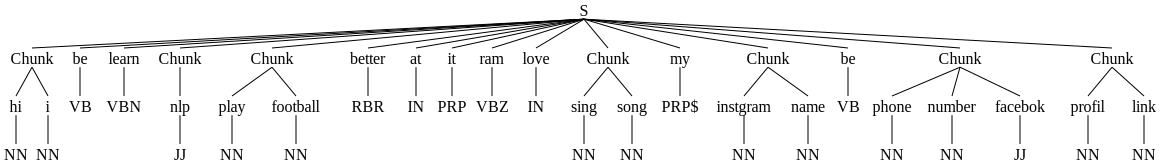

In [ ]:
chunkpattern = '''Chunk:{<NN.?>*<JJ.?>?}'''
chunker = nltk.RegexpParser(chunkpattern)
output = chunker.parse(tagged)
print(output)
output

Chinking

In [ ]:
chinkpattern = '''Chunk:{<NN.?>*<JJ.?>?}
                        }<JJ>{'''

(S
  (Chunk hi/NN i/NN)
  be/VB
  learn/VBN
  nlp/JJ
  (Chunk play/NN football/NN)
  better/RBR
  at/IN
  it/PRP
  ram/VBZ
  love/IN
  (Chunk sing/NN song/NN)
  my/PRP$
  (Chunk instgram/NN name/NN)
  be/VB
  (Chunk phone/NN number/NN)
  facebok/JJ
  (Chunk profil/NN link/NN))


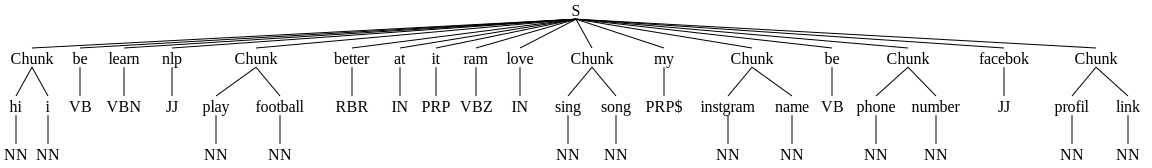

In [ ]:
chinker = nltk.RegexpParser(chinkpattern)
output1 = chinker.parse(tagged)
print(output1)
output1

### Feature Engineering: (aka Feature Extraction, Vectorization)
>We cannot give our text data directly to our model. ML models don't understand text data. we need to convert it to some numerical format, basically called as vectors in NLP.
Feature Engineering is converting of text data to numerical data. 

>*Techniques:*<br>
- One Hot Encoding<br>
- Bag of Words<br>
- n-grams<br>
- Tf-Idf (Term Frequency & Inverse document frequency)<br>
- Word2Vec<br>

#### Bag of Words:
> - simplest form of text representation <br>
> - frequency based <br>
> - describes the occurance of words within documents <br>
> - especially used in text classification tasks <br>

Drawbacks:
1. The size of vectors depend on size of vocabulary. Adding sentence with new words increase the size of vector.
2. There are lots of zeros in matrix as vocab size increases causing sparsity of matrix.
3. It is only based on unique words and ordering of words (semantic meaning) is not taken care of.

#### TF-IDF (Term Frequency and Inverse Document Frequency)

> statistical measure that evaluates how relevant a word is to a document in collection of documents <br>
> TF-IDF = TF * IDF

> Term-Frequency:<br>
> - measures how frequent a term appears in a document <br>
> - words that are present in abundance will have higher TF

> Inverse Document Frequency: <br>
> - measures how important a word is <br>
> - abundant words will have lower value

Drawbacks:
1. It can't capture the semantic meanings.

####  Word2Vec


Word Embedding:
Humans can easily understand assocaiation between words, but machines can't. So, word embedding came into picture. Eg; man-boy, boy-table.<br>
It is a representation of words for text analysis in a vector form that encodes meaning of word such that words closer in vector spaces are expected to be similar in meaning.

Word2Vec is a deep learning-based word embedding technique that converts given word into a vector as collection of numbers.
It captures semantic meaning.

It uses two algorithms:
1. Continuous Bag of Words (CBOW)
2. Skip-gram

### Bag of Words (BOW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus = [
        'This is the first document.',
        'This document is the second document.',
        'And this is the third one',
        'Is this the first document?',
]

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X.toarray()) # converts into matrix

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


### BOW (n-grams)

In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(3,3))
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names())

['and this is', 'document is the', 'is the first', 'is the second', 'is the third', 'is this the', 'the first document', 'the second document', 'the third one', 'this document is', 'this is the', 'this the first']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X2.toarray())

[[0 0 1 0 0 0 1 0 0 0 1 0]
 [0 1 0 1 0 0 0 1 0 1 0 0]
 [1 0 0 0 1 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 0 0 0 1]]


### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer3 = TfidfVectorizer()
vectors = vectorizer3.fit_transform(corpus)

In [ ]:
vectors

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer3.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']